# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year.

Brief Description of each column in the dataset

- 1.**id** - Unique id's for each row
- 2.**imdb_id** - System generated unique id
- 3.**popularity** - popularity score 
- 4.**budget** - budget in dollars
- 5.**revenue** - revenue in dollars
- 6.**original_title** - Movie title
- 7.**cast** - cast performed in movie
- 8.**homepage** - website link of movie
- 9.**director** - director name
- 10.**tagline** - tagline of movie
- 11.**keywords** - words used to give significant idea
- 12.**overview** - general review of movie
- 13.**runtime** - movie duration in minutes
- 14.**genres** - categories of movie
- 15.**production_companies** - company name which manages a movie process from start to finish
- 16.**release_date** - movie releasing date
- 17.**vote_count** - votes given by viewers
- 18.**vote_average** - average votes given by viewers
- 19.**release_year** - movie releasing year
- 20.**budget_adj**-budget in 2010 dollars,accounting for inflation
- 21.**revenue_adj** -revenue in 2010 dollars,accounting for inflation

In [1]:
## Importing Necessary libraries

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Read TMDb movie csv file
tmdb_movies = pd.read_csv('tmdb-movies.csv')
print(f"Number of Observations in tmdb-movie datset: {tmdb_movies.shape}")
tmdb_movies.head()

Number of Observations in tmdb-movie datset: (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
for index,col in enumerate(tmdb_movies):
    print(index,col)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [4]:
tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Release date in object instead of datetime.Let's fix it.

In [5]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
#extract weekday name and month from release date
tmdb_movies['release_weekday_name'] = pd.to_datetime(tmdb_movies['release_date']).dt.weekday_name
tmdb_movies['release_month'] = pd.to_datetime(tmdb_movies['release_date']).dt.month

We have date,month,weekday_name in three different columns. Hence deleting release_date column.

In [6]:
tmdb_movies.drop(labels = 'release_date',axis = 1,inplace = True)

In [7]:
percent = ((tmdb_movies.isnull().sum() / tmdb_movies.shape[0])*100).sort_values(ascending = False)
total = tmdb_movies.isnull().sum().sort_values(ascending = False)
pd.concat([total,percent],axis = 1, keys = ['total','percent'])

,total,percent
homepage,7930,72.979937
tagline,2824,25.989324
keywords,1493,13.740107
production_companies,1030,9.479109
cast,76,0.699429
director,44,0.404933
genres,23,0.211669
imdb_id,10,0.092030
overview,4,0.036812
popularity,0,0.000000


- id,imdb_id are both system generated numbers. Keep one of the two.
- vote count,vote average gives similar information about votes given by viewers.
- Homepage column has 72% null values.It would be good idea to delete it instead of working on it.


In [8]:
tmdb_movies.drop(labels = ['homepage','tagline','imdb_id'], axis= 1,inplace = True)

### Let's look at numerical data 

In [9]:
num_col = tmdb_movies.dtypes[tmdb_movies.dtypes != 'object'].index
num_col

Index(['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'release_month'],
      dtype='object')

In [10]:
tmdb_movies[num_col[1:]].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,6.827259
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,3.441802
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


- Lot of columns are skewed except the vote_average

<Figure size 1584x864 with 0 Axes>

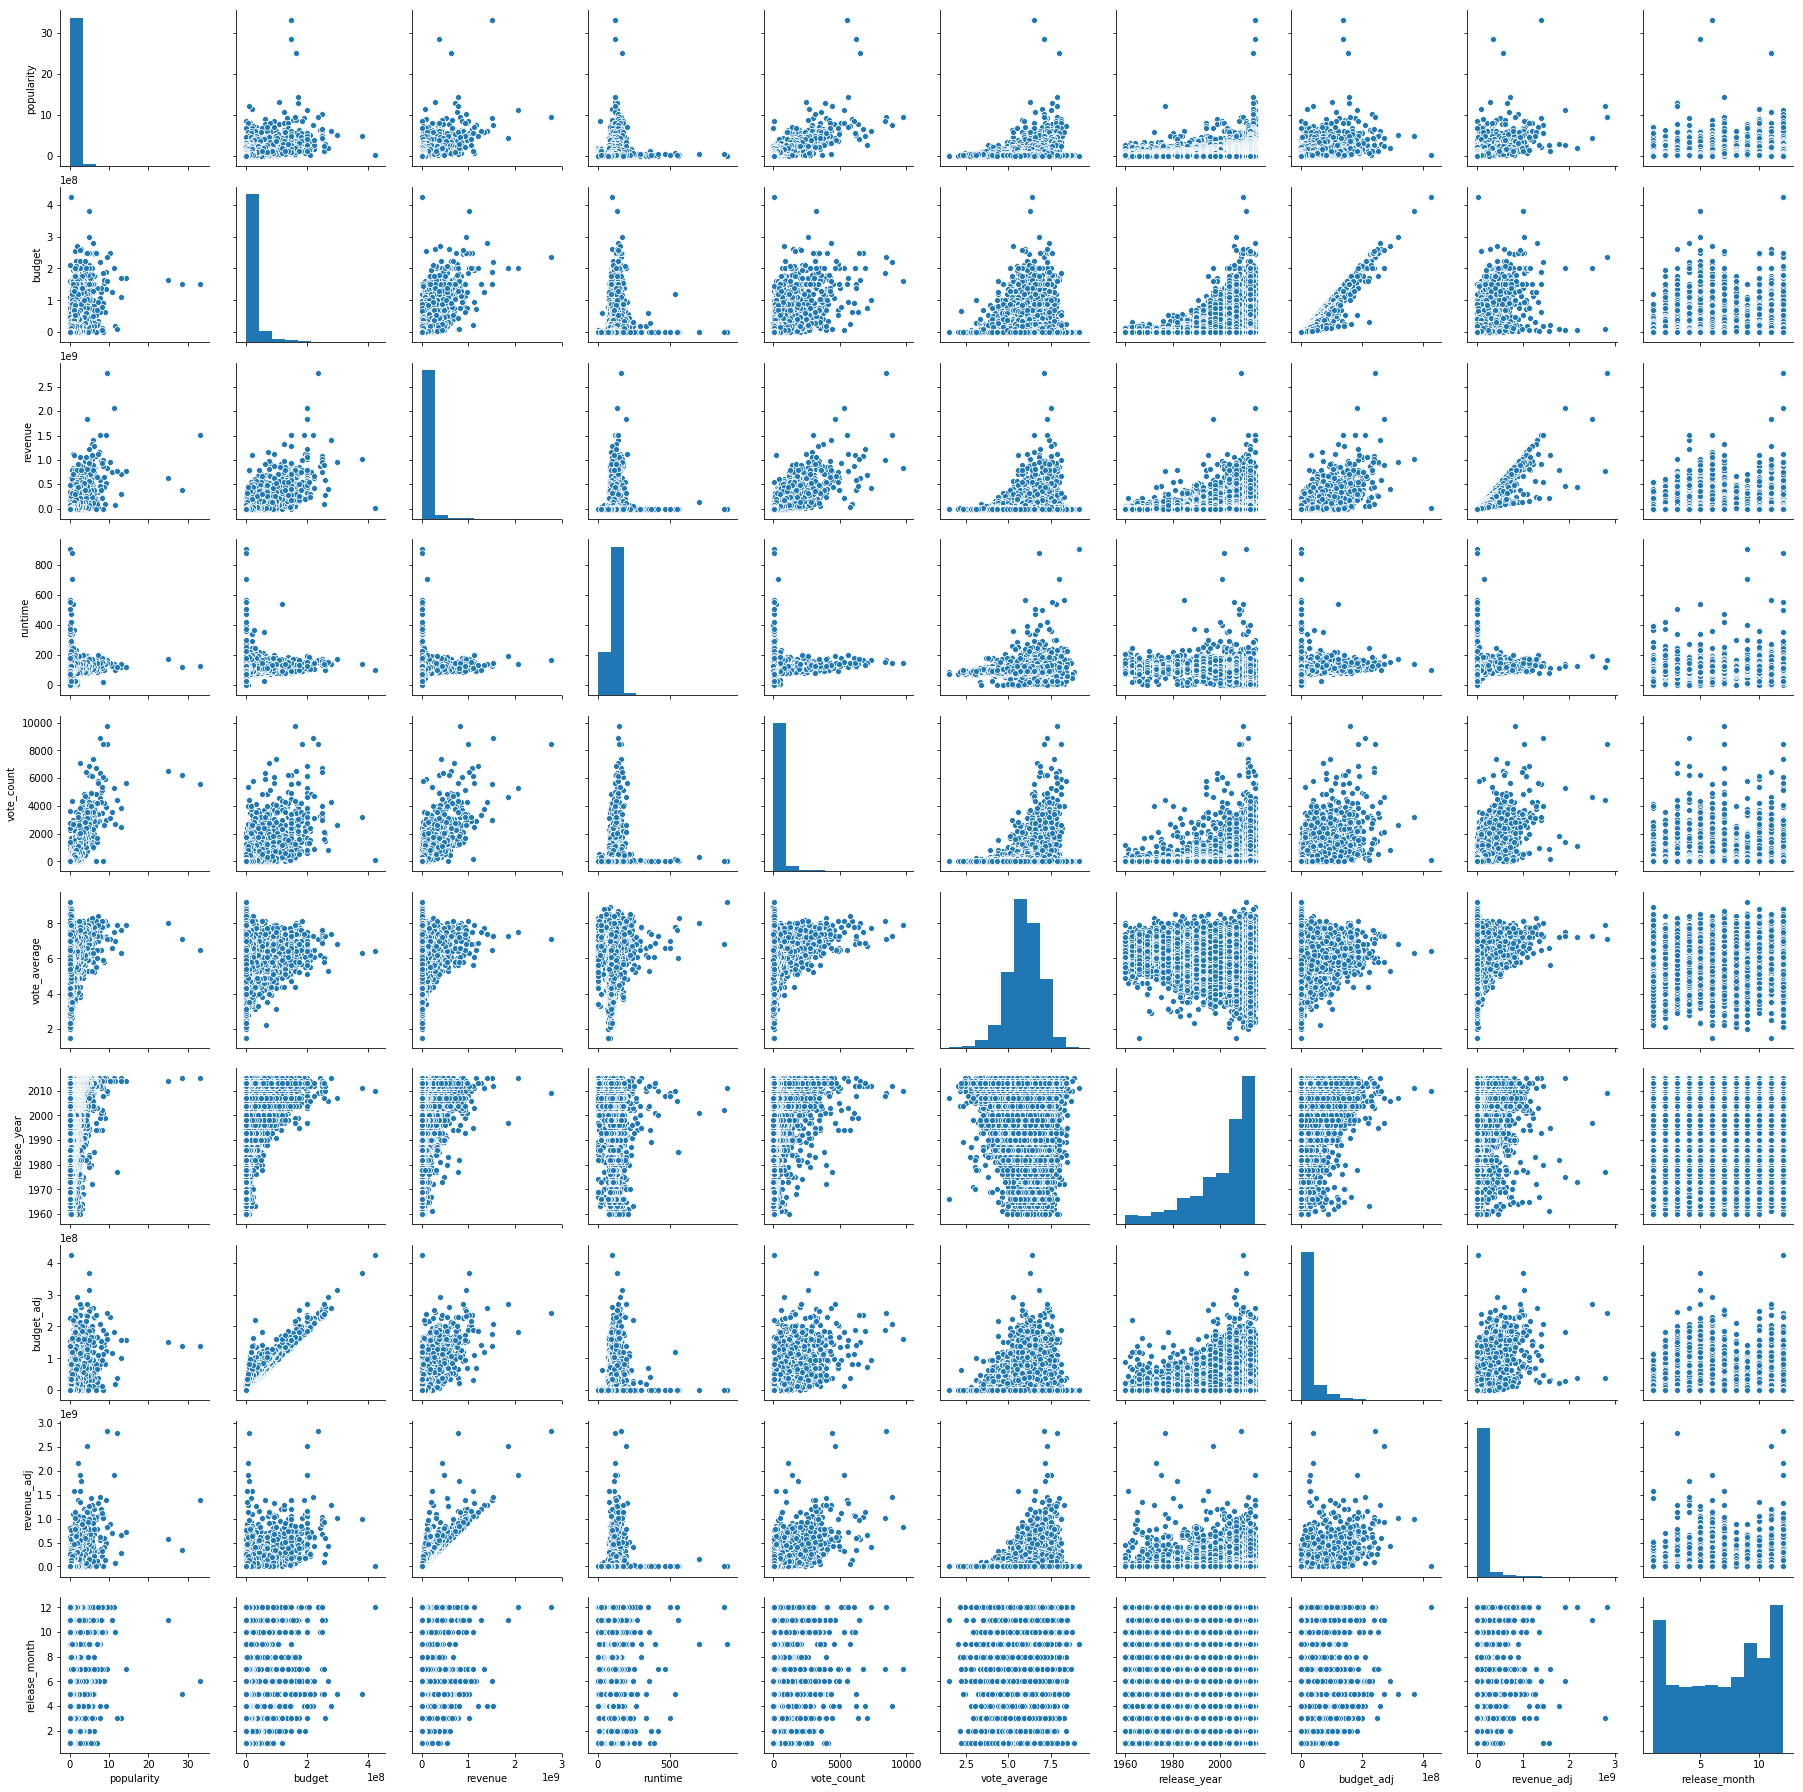

In [11]:
plt.figure(figsize = (22,12));
sns.pairplot(tmdb_movies[num_col[1:]]);

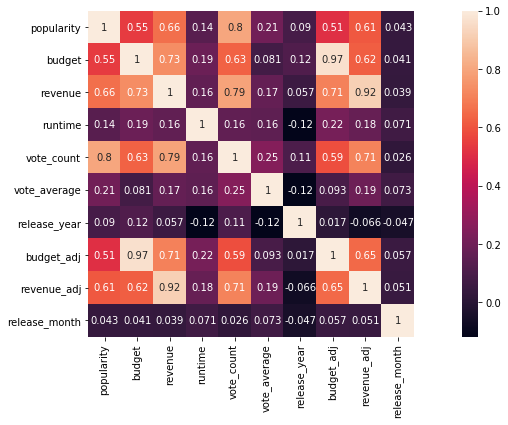

In [12]:
plt.figure(figsize = (17,6));
corr = tmdb_movies[num_col[1:]].corr()
sns.heatmap(corr,annot = True,square = True);

- Revenue and budget shows a strong postive correlation.

<a id='wrangling'></a>
## Wrangling

In [13]:
runtime_0 = tmdb_movies[tmdb_movies['runtime'] == 0]
print(f"Number of movies with zero runtimes: {runtime_0.shape[0]}")

runtime_0.sample(5)

Number of movies with zero runtimes: 31


,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_weekday_name,release_month
3857,289097,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,NaN,Cocky young attorney Michael Gray finds himsel...,0,Horror,Access Motion Pictures,13,5.2,2011,0.000000e+00,0.0,Friday,6
5938,191562,0.147188,0,0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,Krishna D.K.|Raj Nidimoru,hindi|zombies island|zombies|zombie survival,"A rave party off the coast of Goa, goes horrif...",0,Comedy|Horror,Eros International,16,5.3,2013,0.000000e+00,0.0,Friday,5
5920,248842,0.165765,0,0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...,Dominic Harari|Teresa Pelegri,woman director,A dysfunctional love story about an Irish food...,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox In...,12,5.6,2013,0.000000e+00,0.0,Wednesday,12
3329,20414,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,NaN,No overview found.,0,Family,Filmauro,35,5.3,2008,0.000000e+00,0.0,Friday,3
6383,26985,0.371630,2000000,0,The 12 Dogs of Christmas,Jordan-Claire Green|Tom Kemp|Susan Wood|Adam H...,Kieth Merrill,holiday,This holiday tale has all the elements of a cl...,0,Drama|Family,NaN,11,4.7,2005,2.233127e+06,0.0,Tuesday,11


Movies with runtimes of zero also has revenue and budget values zero but they have rest of the necessary information.
There can be some other issues for not putting this data in the dataset.
Let's delete these rows.

In [14]:
print("Number of observations with runtimes of  0", tmdb_movies.shape)
tmdb_movies.drop(labels = runtime_0.index,axis = 0,inplace = True)
print("Number of observations after removing", tmdb_movies.shape)

Number of observations with runtimes of  0 (10866, 19)
Number of observations after removing (10835, 19)


In [15]:
print(f"Number of Movies with revenue and budget zero are {tmdb_movies.query('budget == 0 & revenue == 0').shape[0]}")

Number of Movies with revenue and budget zero are 4673


In [16]:
print("Number of observations with revenue and budget zero", tmdb_movies.shape)
tmdb_movies.drop(tmdb_movies.query('budget == 0 & revenue == 0').index,axis = 0,inplace = True)
print("Number of observations after removing", tmdb_movies.shape)

Number of observations with revenue and budget zero (10835, 19)
Number of observations after removing (6162, 19)


In [17]:
print("Number of Duplicates:",tmdb_movies.duplicated().sum())
print("Number of observations including duplicates", tmdb_movies.shape)

Number of Duplicates: 1
Number of observations including duplicates (6162, 19)


In [18]:
tmdb_movies.drop_duplicates(keep= 'first', inplace = True)
print("Number of observations after removing duplicates",tmdb_movies.shape)

Number of observations after removing duplicates (6161, 19)


Popularity and vote count show a strong positive relation

vote average is calculated from vote count and is not skewed.

Revenue and budget are in US dollars and revenue_adj budget_adj account for inflation in 2010.


SO Let's keep only revenue_adj and budget_adj columns.

In [19]:
tmdb_movies.drop(labels = ['vote_count','revenue','budget'],axis = 1,inplace= True)

In [20]:
# create col gross profit in dollars
tmdb_movies['gross_profit_adj'] = tmdb_movies['revenue_adj'] - tmdb_movies['budget_adj']

In [21]:
cat_col = tmdb_movies.dtypes[tmdb_movies.dtypes == 'object'].index
tmdb_movies[cat_col].head()

,original_title,cast,director,keywords,overview,genres,production_companies,release_weekday_name
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Tuesday
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,Wednesday
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Wednesday
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,Tuesday
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,Wednesday


- As we can see cast, genres, keywords, production_companies are separated by '|' character.
- I have decided to seaprate them using split function and create different dataframes for each of these.
- Then accordingly merge them whenever required.

In [22]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(tmdb_movies['genres'])
keywords = separate(tmdb_movies['keywords'])
cast = separate(tmdb_movies['cast'])
production_companies =  separate(tmdb_movies['production_companies'])
director =  separate(tmdb_movies['director'])


In [23]:
genres['id'] = tmdb_movies['id']
keywords['id'] = tmdb_movies['id']
cast['id'] = tmdb_movies['id']
production_companies['id'] = tmdb_movies['id']
director['id'] = tmdb_movies['id']

In [24]:
def melt(df,col_name):
    return pd.melt(df,id_vars = 'id',value_name = col_name).drop(labels = 'variable',axis = 1)
genres = melt(genres,'genres')
keywords = melt(keywords,'keywords')
cast = melt(cast,'cast')
production_companies = melt(production_companies,'production_companies')
director = melt(director,'director')

In [25]:
genres.dropna(inplace = True)
cast.dropna(inplace = True)
keywords.dropna(inplace = True)
production_companies.dropna(inplace = True)
director.dropna(inplace = True)

In [26]:
drop_labels = ['genres','cast','keywords','production_companies','director']
tmdb_movies.drop(labels = drop_labels,axis = 1,inplace = True)
print("Number of observations", tmdb_movies.shape)

Number of observations (6161, 12)


<a id='eda'></a>
## Exploratory Data Analysis

## Duration of movies

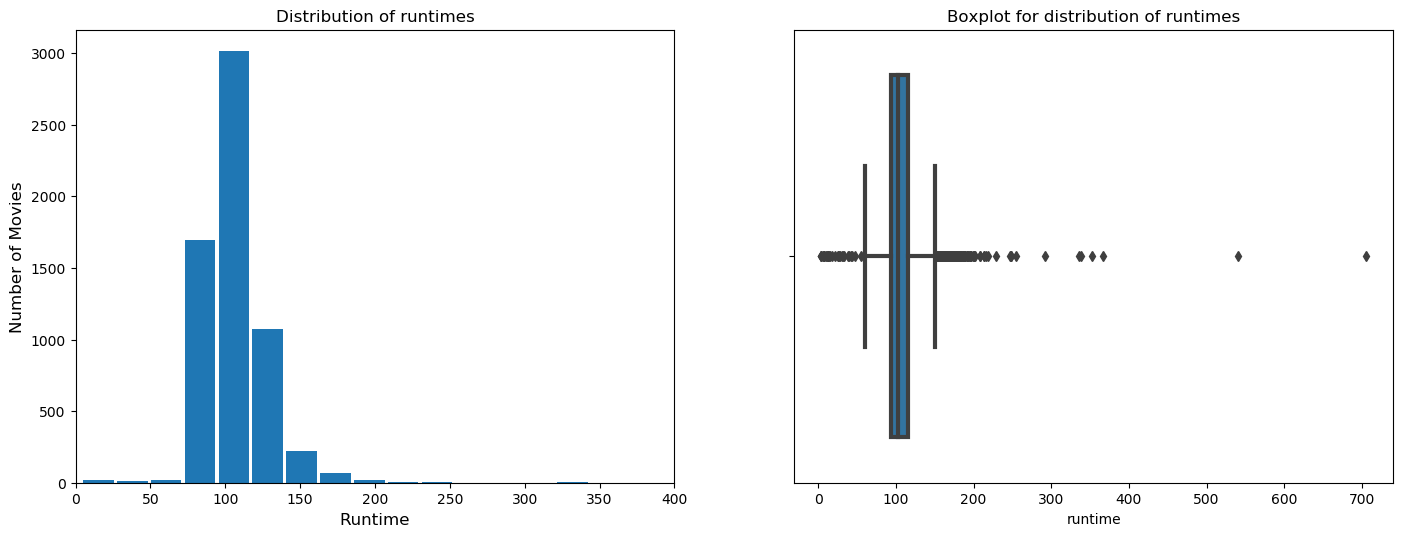

In [27]:
fig = plt.figure(figsize = (17,6),dpi = 100);
fig.add_subplot(1,2,1)
plt.hist(tmdb_movies['runtime'],bins = 31, rwidth = 0.9);
plt.xlabel('Runtime', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of runtimes', fontsize = 12);
plt.xlim(0,400);

fig.add_subplot(1,2,2);
sns.boxplot(tmdb_movies['runtime'],linewidth = 3);
plt.title('Boxplot for distribution of runtimes', fontsize = 12);

- As we can see generally movies with runtimes of 100mins are made the most.
- But there are lot of outliers and we can even see some movies with a runtime of more than 800mins i.e. 13hrs.Have you ever seen such movie. I haven't.
- Let's dig in more.

- There can be one possibility which I can think of is they might not be movies but a series or something

In [28]:
print(f"Mean runtime of movies in our dataset: {tmdb_movies['runtime'].mean(): .4f}mins")

Mean runtime of movies in our dataset:  106.5058mins


- Generally movies can have a runtime upto 3 hours but not above it 
- we do have movies above 300minutes runtime and let's find them.

In [29]:
print(f"Number of movies above 3 hours of runtime:{tmdb_movies[tmdb_movies['runtime'] > 180].shape[0]}")

Number of movies above 3 hours of runtime:53


In [30]:
miniseries_df = tmdb_movies[tmdb_movies['runtime'] > 180]

- As we concluded they are not movies but miniseries hence removing them from our movie dataset.

In [31]:
print(f"Number of observations before removing miniseries: {tmdb_movies.shape}")
tmdb_movies.drop(labels = tmdb_movies[tmdb_movies['runtime'] > 180].index,axis = 0,inplace = True)
print(f"Number of observations after removing miniseries: {tmdb_movies.shape}")

Number of observations before removing miniseries: (6161, 12)
Number of observations after removing miniseries: (6108, 12)


In [85]:
sc_rev_bud=tmdb_movies.query("revenue_adj > 0 & budget_adj > 0")

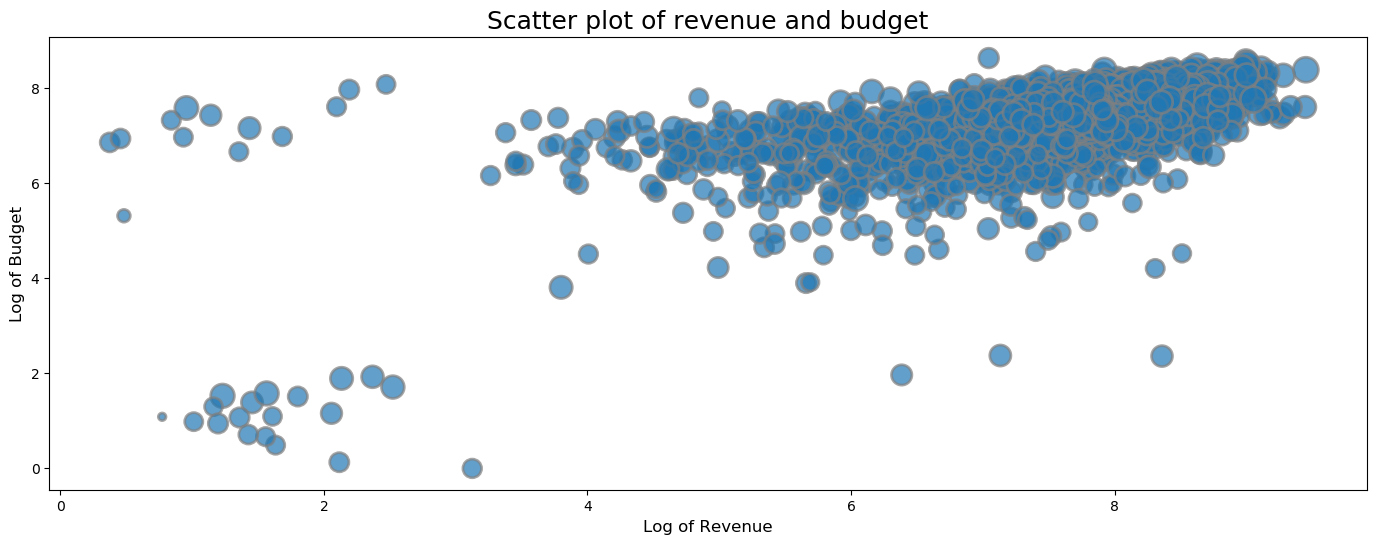

In [101]:
plt.figure(figsize = (17,6),dpi = 100);
z = sc_rev_bud['runtime'] 
plt.scatter(x= np.log10(sc_rev_bud['revenue_adj']),
            y =np.log10(sc_rev_bud['budget_adj']),s = z*2,
           cmap="Blues", alpha = 0.7,edgecolors="grey", linewidth=2);
plt.xlabel('Log of Revenue',fontsize = 12);
plt.ylabel('Log of Budget',fontsize= 12);
plt.title("Scatter plot of revenue and budget", fontsize = 18);

## In which year highest number of movies released.

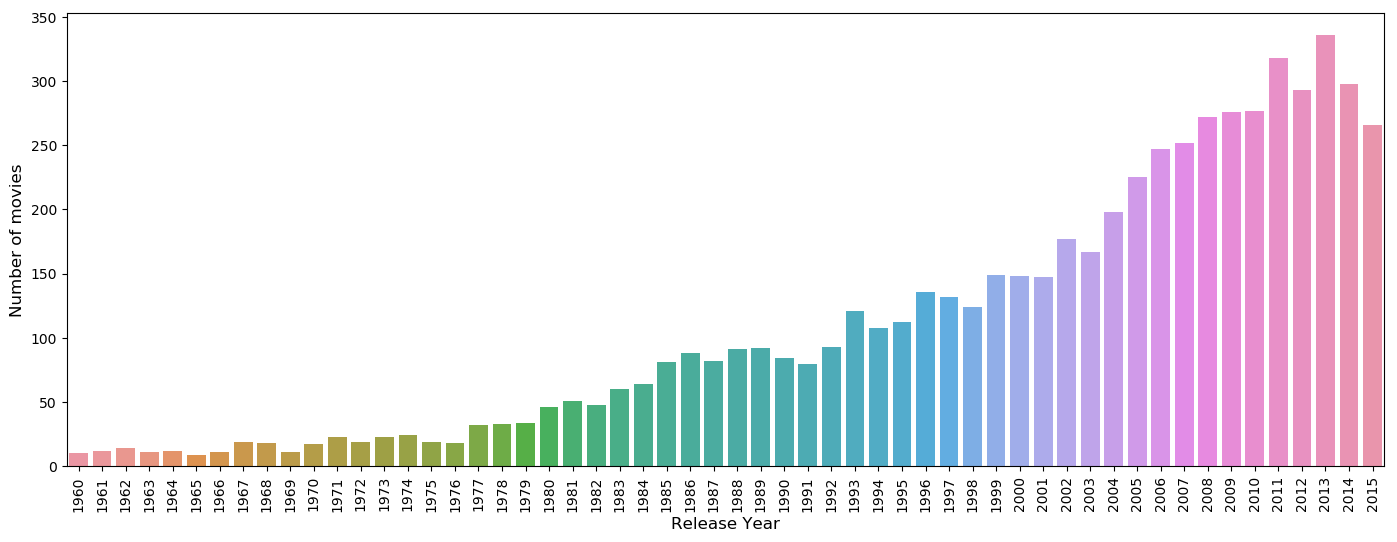

In [32]:
plt.figure(figsize = (17,6),dpi = 100);
sns.countplot(tmdb_movies['release_year']);
plt.xlabel('Release Year', fontsize = 12);
plt.ylabel("Number of movies", fontsize = 12);
plt.xticks(rotation = 90);

- In 2014 recorded highest number of movies and 1960 recorded lowest.
- The graph also depicts every year releasing movie has been increased.
- Let's also observe the decade 

In [33]:
tmdb_movies['decade'] = tmdb_movies['release_year'].apply(lambda x:(x//10)*10)

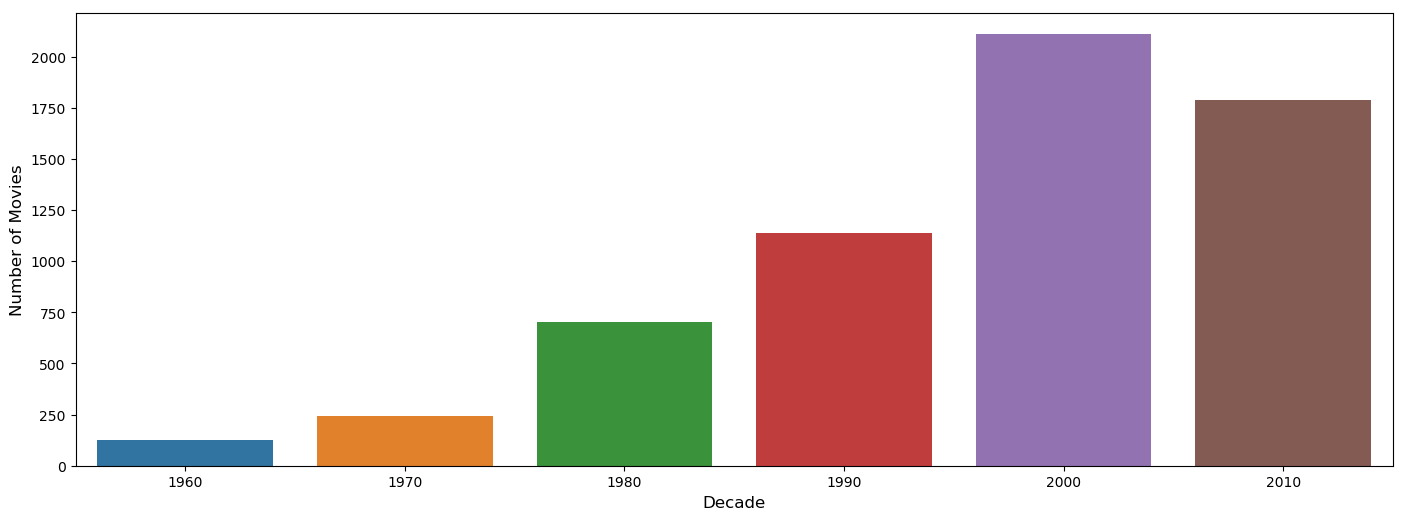

In [34]:
plt.figure(figsize = (17,6),dpi = 100);
sns.countplot(tmdb_movies['decade']);
plt.xlabel('Decade',fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);


- 2000 shows a tremendous growth in releasing movies.
- 2010 includes only 5 years from 2011 to 2015.

In [35]:
tmdb_movies['release_month'] = tmdb_movies['release_month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                  7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

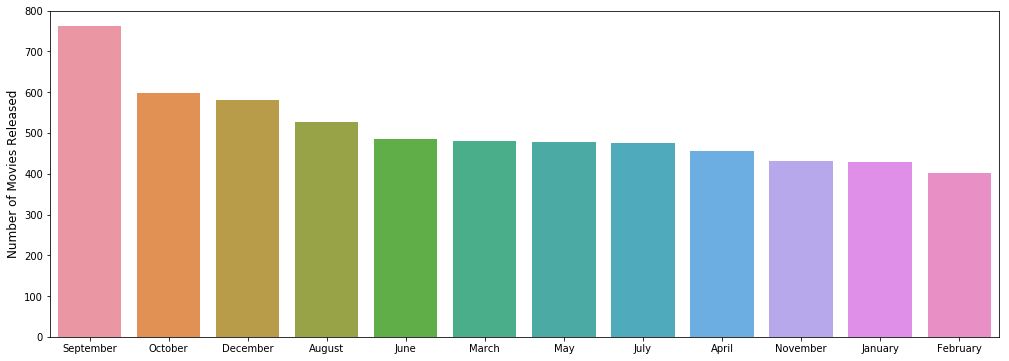

In [36]:
mov_mon = tmdb_movies['release_month'].value_counts().sort_values(ascending = False)

plt.figure(figsize = (17,6));

sns.barplot(x = mov_mon.index,
           y = mov_mon.values,
           order = mov_mon.index);
plt.ylabel('Number of Movies Released',fontsize = 12);




## In which genres most movies are made.

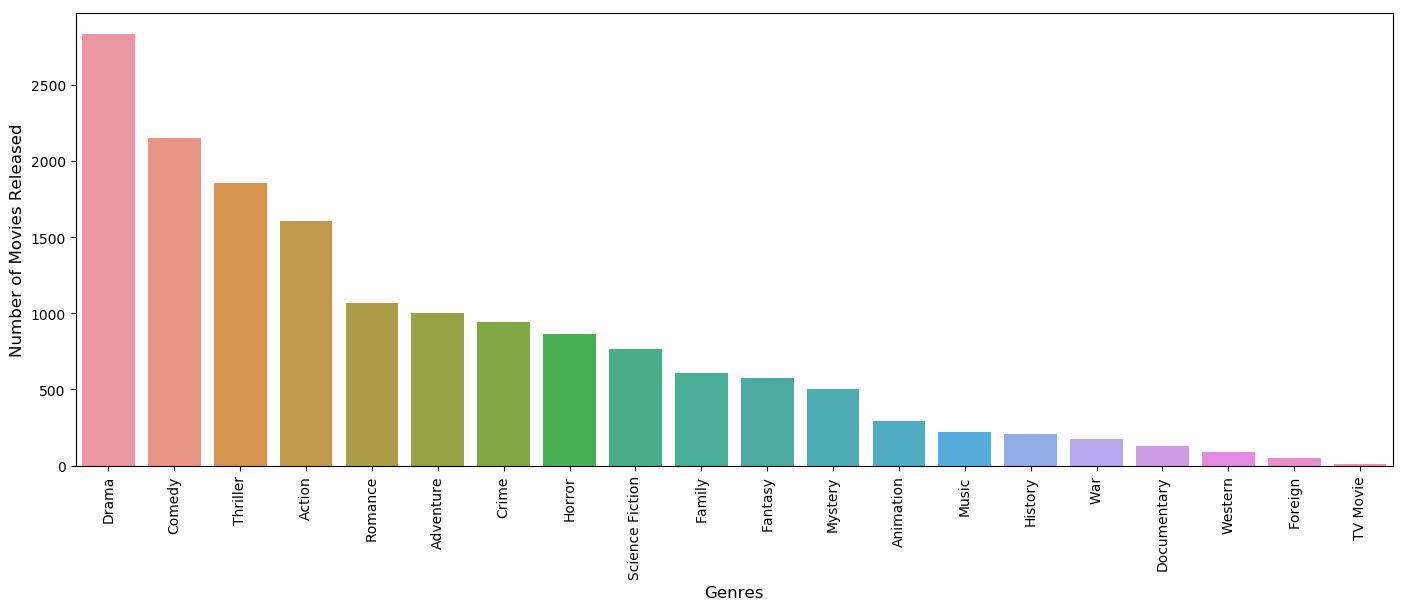

In [37]:
plt.figure(figsize = (17,6),dpi = 100);
sns.countplot(genres['genres'],order = genres['genres'].value_counts().index);
plt.xticks(rotation = 90);
plt.ylabel('Number of Movies Released',fontsize = 12);
plt.xlabel("Genres", fontsize = 12);


## What are the popular genres.

In [38]:
mov_gen = pd.merge(tmdb_movies,genres,on  = 'id')

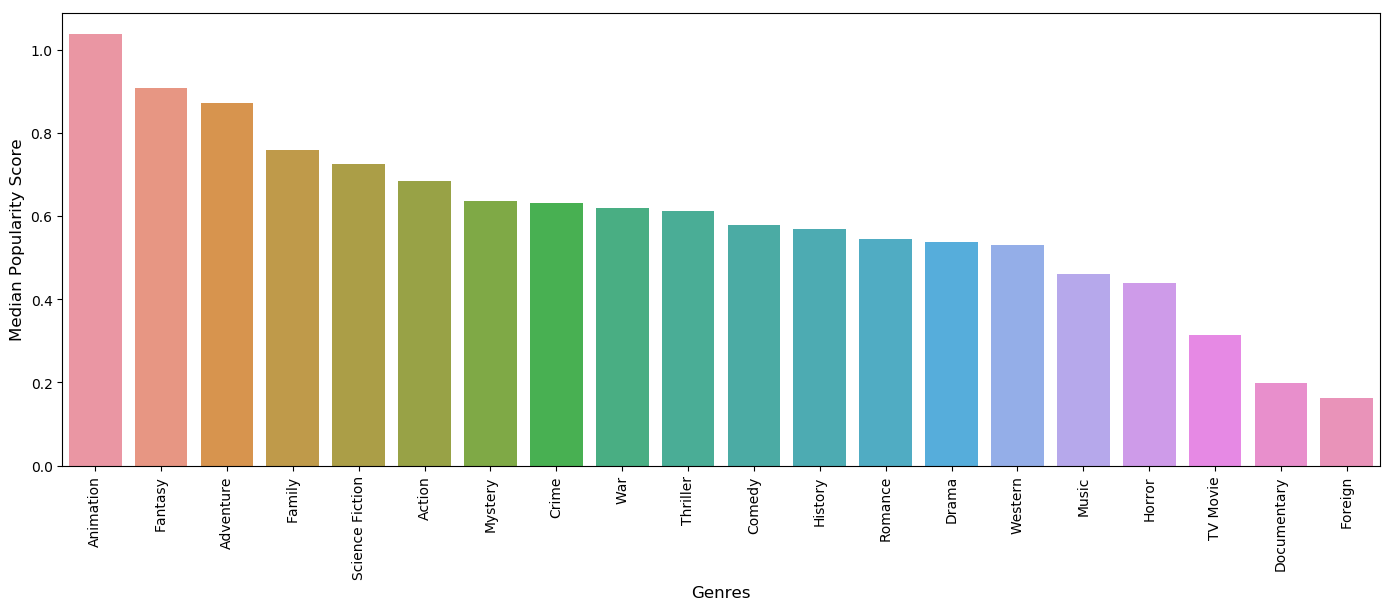

In [39]:
plt.figure(figsize = (17,6),dpi = 100);

sns.barplot(x = mov_gen.groupby('genres').median()['popularity'].sort_values(ascending = False).index, 
            y = mov_gen.groupby('genres').median()['popularity'].sort_values(ascending = False).values);
plt.xlabel('Genres', fontsize = 12);
plt.ylabel('Median Popularity Score', fontsize = 12);
plt.xticks(rotation = 90,fontsize = 10);


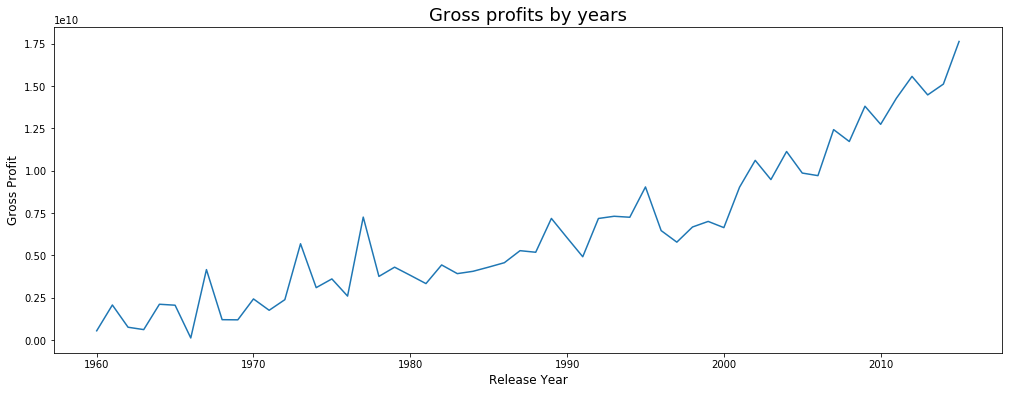

In [110]:
profits_each_year = tmdb_movies.groupby('release_year')['gross_profit_adj'].sum()

plt.figure(figsize = (17,6));
plt.plot(profits_each_year );
plt.xlabel('Release Year', fontsize = 12);
plt.ylabel('Gross Profit',fontsize = 12);
plt.title("Gross profits by years", fontsize = 18);

Let's try understand the graph
- 1e10 on y axis indicates 1x10^10. So if you consider gross profit to be 1.25, It is actually 1.25 x1e10 which 12.5 billion dollars.
- So in 2000 gross profit was 7.5 billion dollars and 2015 it has reach upto 17.5 billion dollars. which shows Growth of around 10 billion dollars in 15years.

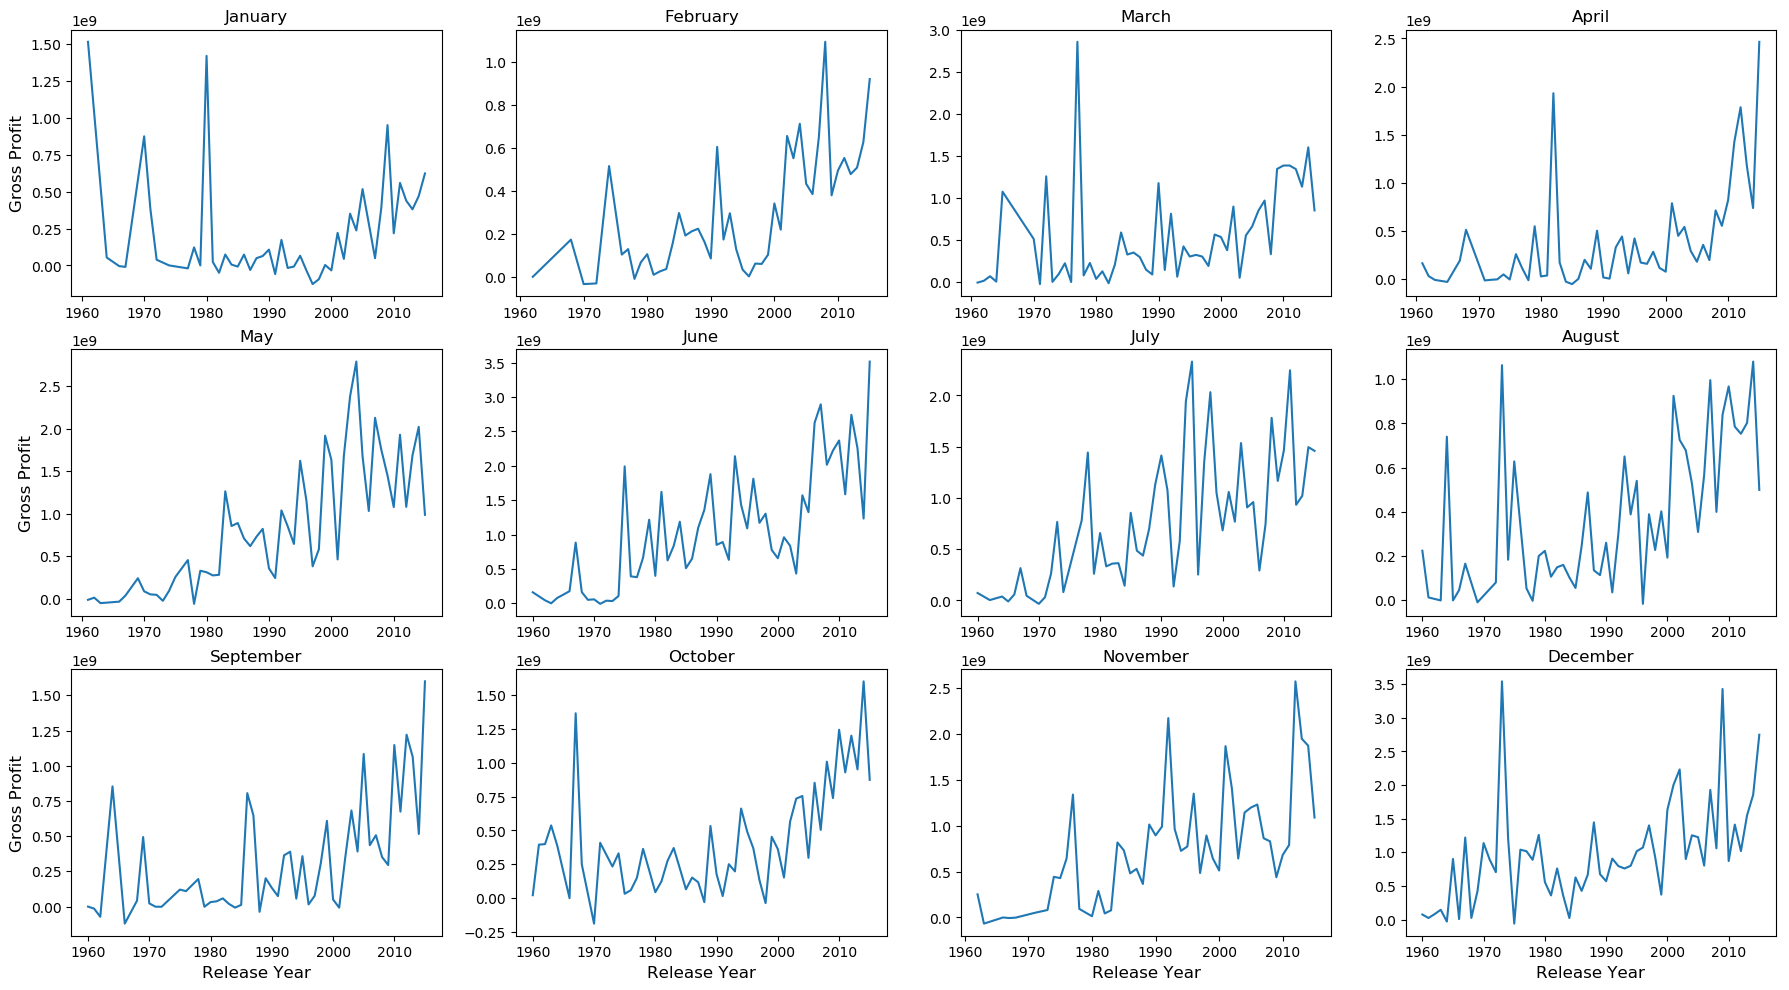

In [41]:
fig = plt.figure(figsize = (22,12),dpi = 100);

fig.add_subplot(3,4,1)
jan = tmdb_movies[tmdb_movies['release_month'] == 'January']
profits_jan = jan.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_jan);
plt.ylabel('Gross Profit',fontsize = 12);
plt.title("January",fontsize = 12);

fig.add_subplot(3,4,2)
feb = tmdb_movies[tmdb_movies['release_month'] == 'February']
profits_feb = feb.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_feb);
plt.title("February",fontsize = 12);

fig.add_subplot(3,4,3)
mar = tmdb_movies[tmdb_movies['release_month'] == 'March']
profits_mar = mar.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_mar);
plt.title("March",fontsize = 12);

fig.add_subplot(3,4,4)
apr = tmdb_movies[tmdb_movies['release_month'] == 'April']
profits_apr = apr.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_apr);
plt.title("April",fontsize = 12);

fig.add_subplot(3,4,5)
may = tmdb_movies[tmdb_movies['release_month'] == 'May']
profits_may = may.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_may);
plt.title("May",fontsize = 12);
plt.ylabel('Gross Profit', fontsize = 12);

fig.add_subplot(3,4,6)
jun = tmdb_movies[tmdb_movies['release_month'] == 'June']
profits_jun = jun.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_jun);
plt.title("June",fontsize = 12);

fig.add_subplot(3,4,7)
jul = tmdb_movies[tmdb_movies['release_month'] == 'July']
profits_jul = jul.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_jul);
plt.title("July",fontsize = 12);

fig.add_subplot(3,4,8)
aug = tmdb_movies[tmdb_movies['release_month'] == 'August']
profits_aug = aug.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_aug);
plt.title("August",fontsize = 12);

fig.add_subplot(3,4,9)
sep = tmdb_movies[tmdb_movies['release_month'] == 'September']
profits_sep = sep.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_sep);
plt.ylabel('Gross Profit', fontsize = 12);
plt.title("September",fontsize = 12);
plt.xlabel('Release Year', fontsize = 12);

fig.add_subplot(3,4,10)
octb = tmdb_movies[tmdb_movies['release_month'] == 'October']
profits_octb = octb.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_octb);
plt.title("October",fontsize = 12);
plt.xlabel('Release Year', fontsize = 12);

fig.add_subplot(3,4,11)
nov = tmdb_movies[tmdb_movies['release_month'] == 'November']
profits_nov = nov.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_nov);
plt.title("November",fontsize = 12);
plt.xlabel('Release Year', fontsize = 12);

fig.add_subplot(3,4,12)
dec = tmdb_movies[tmdb_movies['release_month'] == 'December']
profits_dec = dec.groupby('release_year')['gross_profit_adj'].sum()
plt.plot(profits_dec);
plt.title("December",fontsize = 12);
plt.xlabel('Release Year', fontsize = 12);

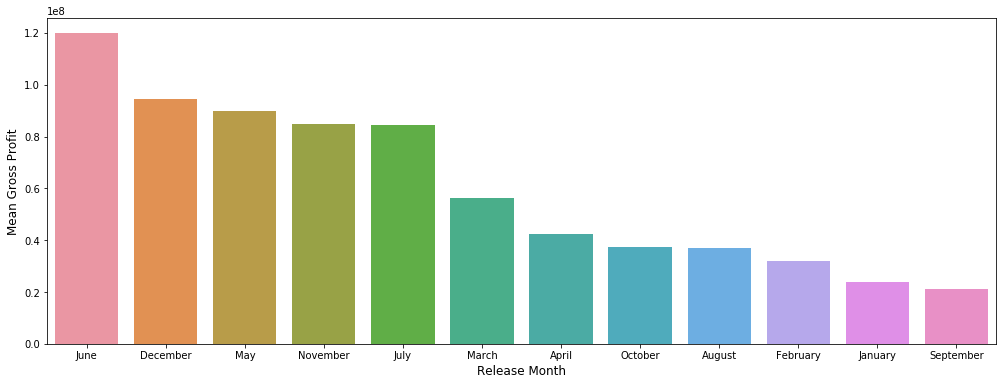

In [76]:
rel_mon = tmdb_movies.groupby('release_month')['gross_profit_adj'].mean().sort_values(ascending = False)
plt.figure(figsize = (17,6));
sns.barplot(x = rel_mon.index,
           y = rel_mon.values
           );
plt.xlabel('Release Month',fontsize = 12);
plt.ylabel('Mean Gross Profit', fontsize = 12);

- Movies released in June, December, May, November, July have earned mean gross profit above 8 Million dollars.

In [42]:
mean_gp = tmdb_movies['gross_profit_adj'].mean()
mov_hgp = tmdb_movies[tmdb_movies['gross_profit_adj'] > mean_gp].sort_values(by = 'gross_profit_adj',ascending = False)

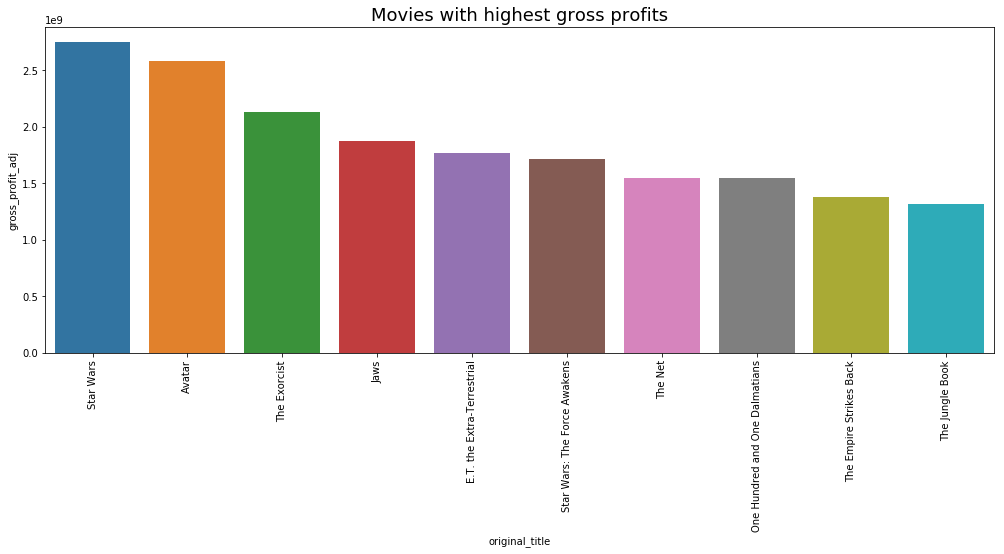

In [102]:
plt.figure(figsize = (17,6));
sns.barplot(x = mov_hgp['original_title'][0:10],
           y = mov_hgp['gross_profit_adj'][0:10]);
plt.xticks(rotation = 90);
plt.title("Movies with highest gross profits", fontsize = 18);


In [44]:
mov_hgp.loc[:,['original_title','release_year']][0:10]

,original_title,release_year
1329,Star Wars,1977
1386,Avatar,2009
10594,The Exorcist,1973
9806,Jaws,1975
8889,E.T. the Extra-Terrestrial,1982
3,Star Wars: The Force Awakens,2015
8094,The Net,1995
10110,One Hundred and One Dalmatians,1961
7309,The Empire Strikes Back,1980
10398,The Jungle Book,1967


- Highest number of movies released in 2014 as per our dataset.
- Avatar was released in 2009 and it had still grab the first positionin highest gross profits. Rest of the movies are from 2010's decade. But The net was only 90's movie to come in the top 10 high gross profits movies list.

In [45]:
mov_lgp = tmdb_movies.sort_values(by = 'gross_profit_adj')

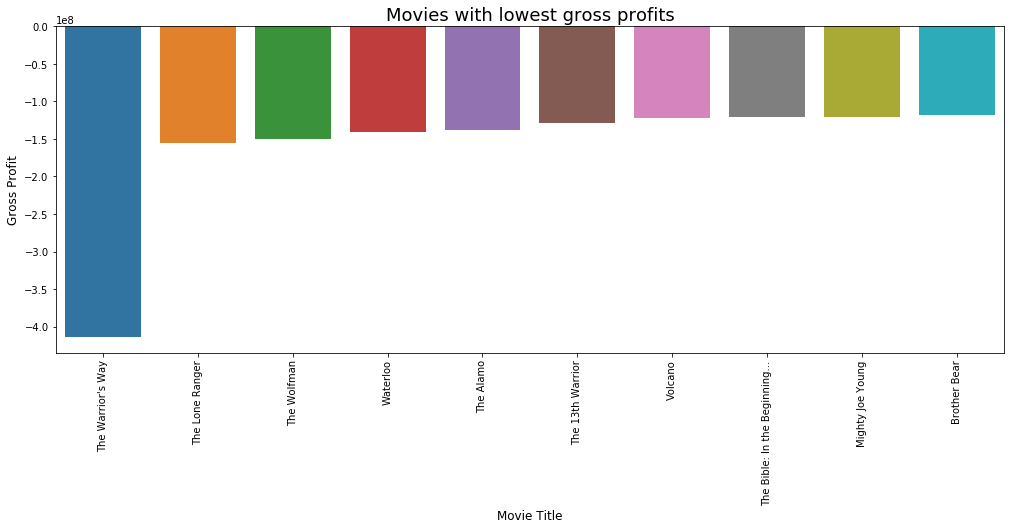

In [103]:
plt.figure(figsize = (17,6));
sns.barplot(x = mov_lgp['original_title'].head(10),
           y = mov_lgp['gross_profit_adj'].head(10));
plt.xticks(rotation = 90);
plt.title("Movies with lowest gross profits", fontsize = 18);
plt.xlabel('Movie Title', fontsize = 12);
plt.ylabel('Gross Profit', fontsize = 12);


In [47]:
mov_lgp.loc[:,['original_title','release_year']].head(10)

,original_title,release_year
2244,The Warrior's Way,2010
5508,The Lone Ranger,2013
2069,The Wolfman,2010
10684,Waterloo,1970
7031,The Alamo,2004
2435,The 13th Warrior,1999
5265,Volcano,1997
10824,The Bible: In the Beginning...,1966
9036,Mighty Joe Young,1998
4970,Brother Bear,2003


- Movies with Low gross profits are coming from different decades. There might be other imporatant features like cast, directors, production companies which influeces the profit and populaity. We will analyse them in further analysis.

# Based on profit

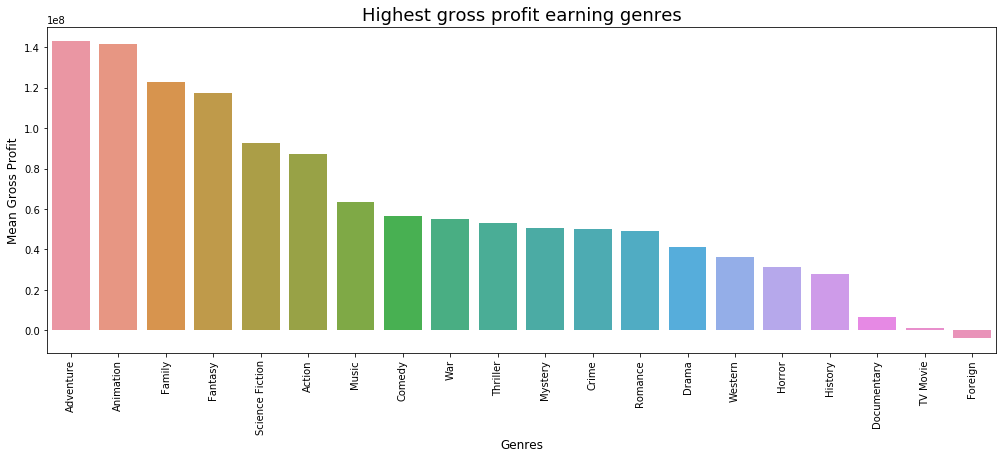

In [109]:
top_gen = mov_gen.groupby('genres')['gross_profit_adj'].mean().sort_values(ascending = False)
plt.figure(figsize = (17,6));
sns.barplot(x = top_gen.index,
            y = top_gen.values);
plt.xlabel('Genres', fontsize = 12);
plt.ylabel('Mean Gross Profit', fontsize = 12);
plt.title("Highest gross profit earning genres", fontsize = 18);
plt.xticks(rotation = 90);

- Adventure, Animation, Family, Fantasy, Science Fiction and Action are top genres making gross profit above 80Million dollars. 

In [49]:
mov_cast = pd.merge(tmdb_movies,cast,on = 'id')
mov_prod_com = pd.merge(tmdb_movies, production_companies, on = 'id')
mov_key = pd.merge(tmdb_movies, keywords, on = 'id')

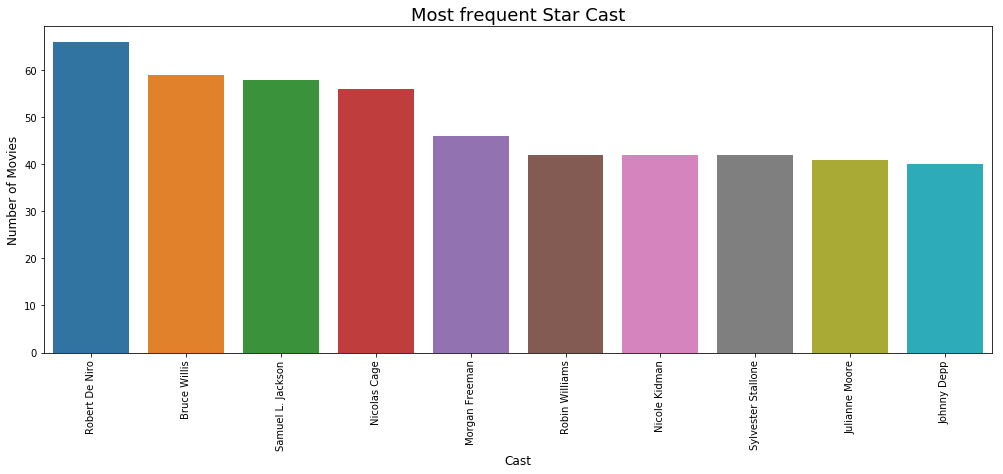

In [104]:
plt.figure(figsize = (17,6));
sns.barplot(x = cast['cast'].value_counts()[0:10].index,
            y = cast['cast'].value_counts()[0:10].values);
plt.xticks(rotation = 90);
plt.xlabel('Cast', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);
plt.title("Most frequent Star Cast", fontsize = 18);

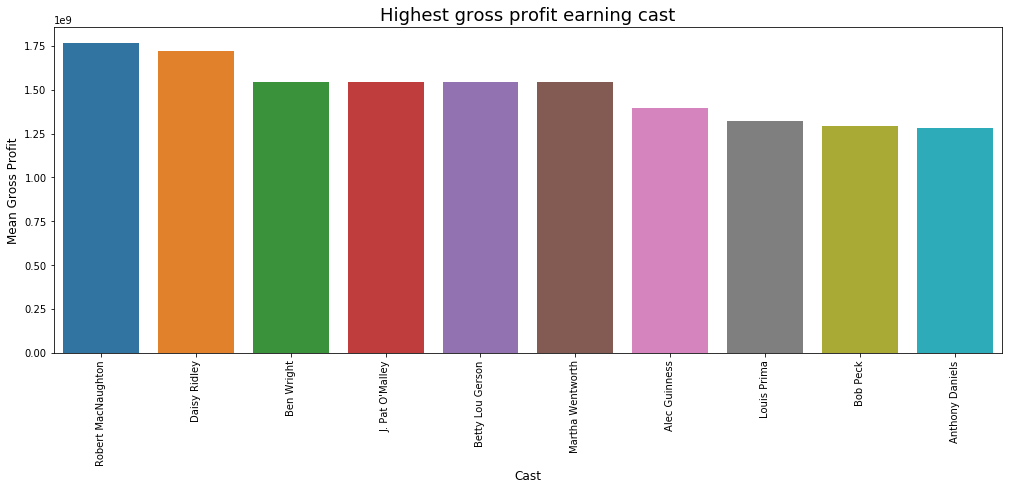

In [107]:
top_cast_gp =mov_cast.groupby('cast')['gross_profit_adj'].mean().sort_values(ascending = False)
plt.figure(figsize = (17,6));

sns.barplot(x = top_cast_gp.index[0:10],
            y = top_cast_gp.values[0:10]);
plt.xlabel('Cast', fontsize=  12);
plt.ylabel('Mean Gross Profit',fontsize = 12);
plt.title("Highest gross profit earning cast", fontsize = 18);
plt.xticks(rotation = 90);



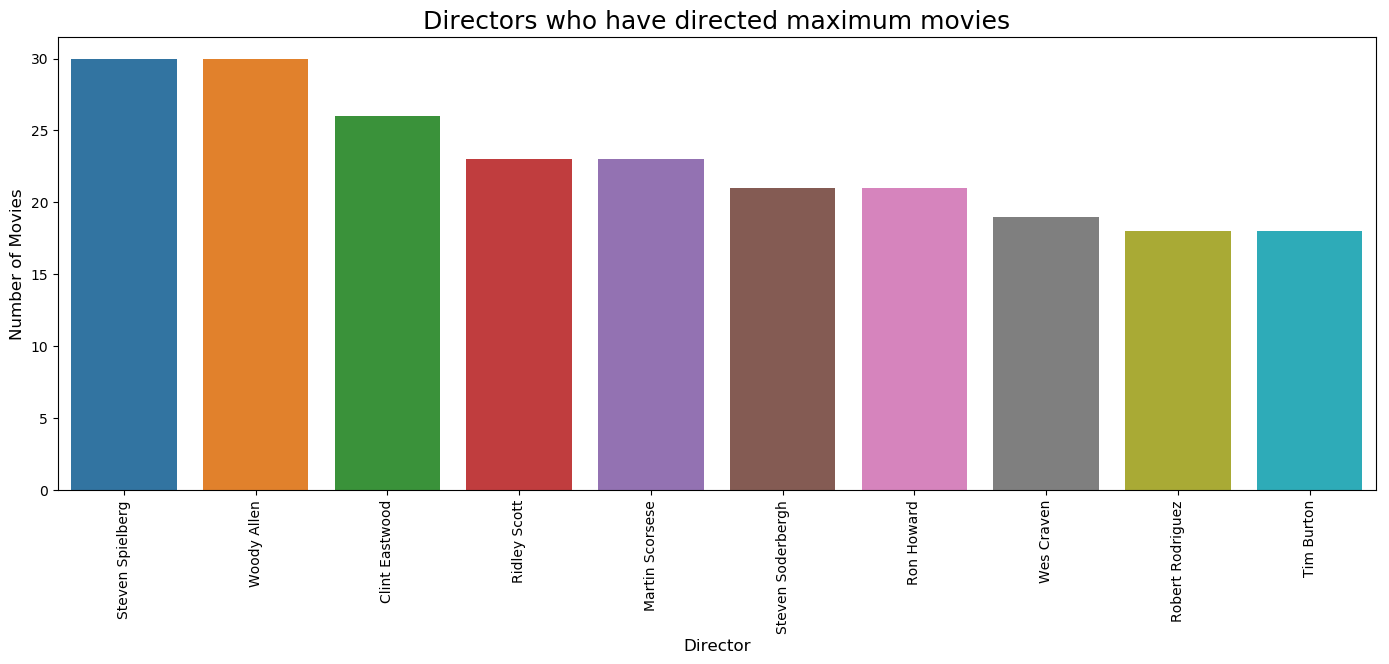

In [105]:
plt.figure(figsize = (17,6),dpi = 100);
sns.barplot(x = director['director'].value_counts()[0:10].index,
            y = director['director'].value_counts()[0:10].values);
plt.xticks(rotation = 90);
plt.xlabel('Director', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);
plt.title("Directors who have directed maximum movies",fontsize = 18);

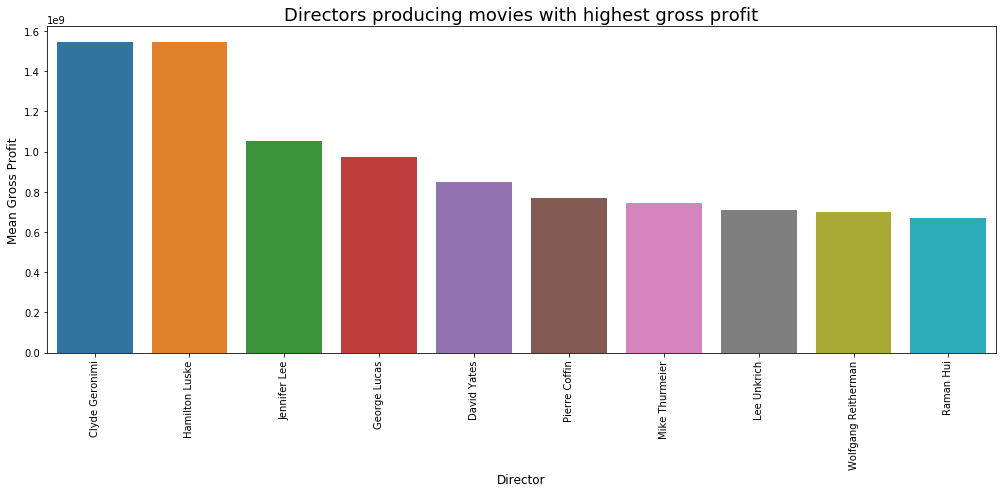

In [106]:
mov_dir = pd.merge(tmdb_movies,director, on = 'id')
dir_hgp = mov_dir.groupby('director')['gross_profit_adj'].mean().sort_values(ascending = False)

plt.figure(figsize = (17,6));

sns.barplot(x = dir_hgp.index[0:10],
            y = dir_hgp.values[0:10]);
plt.xlabel('Director', fontsize=  12);
plt.ylabel('Mean Gross Profit',fontsize = 12);
plt.title("Directors producing movies with highest gross profit",fontsize = 18);
plt.xticks(rotation = 90);

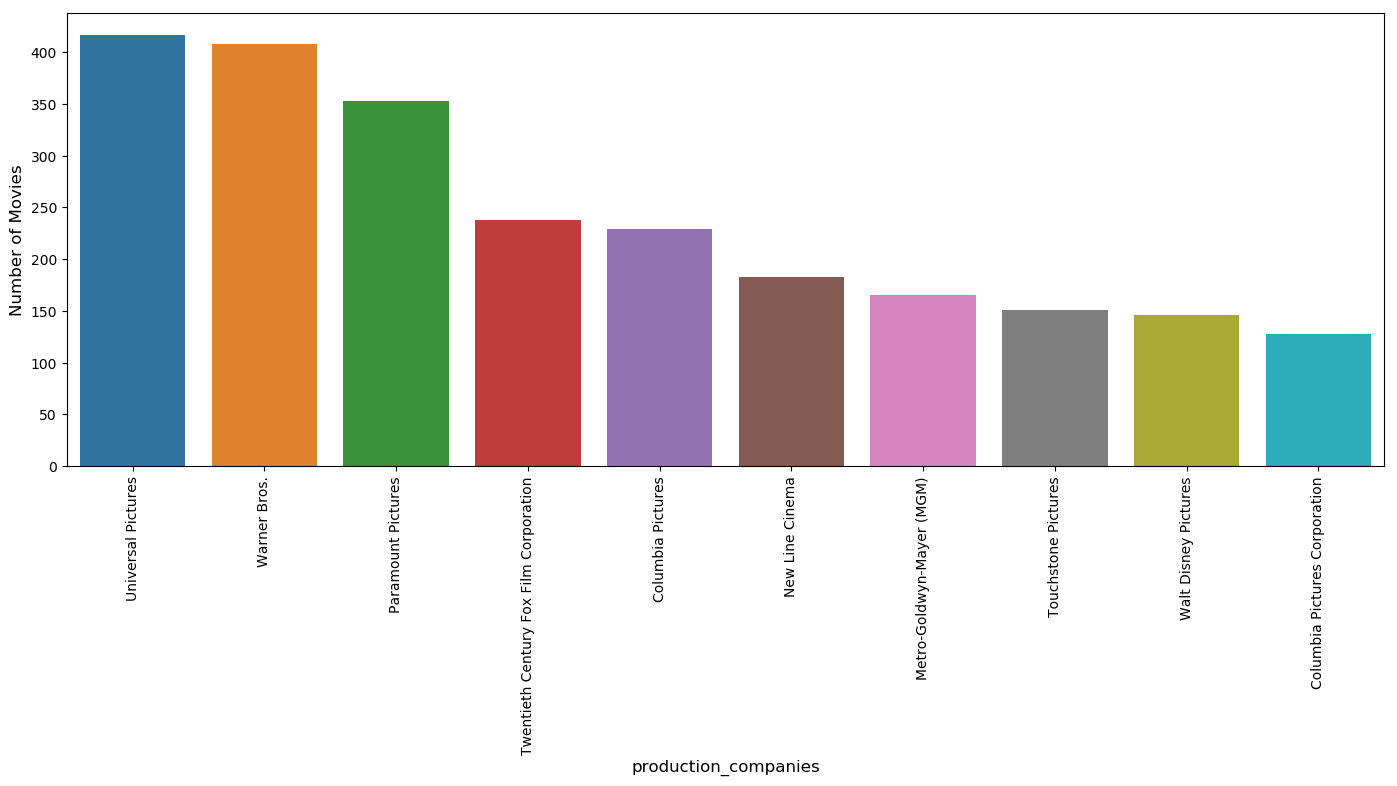

In [64]:
plt.figure(figsize = (17,6),dpi = 100);
sns.barplot(x = production_companies['production_companies'].value_counts()[0:10].index,
            y = production_companies['production_companies'].value_counts()[0:10].values);
plt.xticks(rotation = 90);
plt.xlabel('production_companies', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);

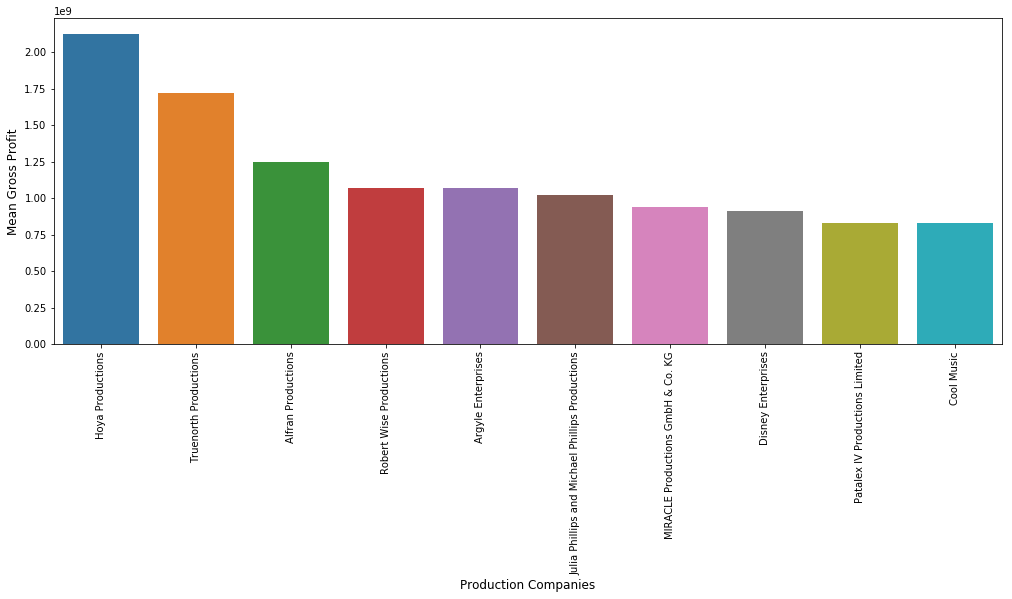

In [71]:
prod_hgp = mov_prod_com.groupby('production_companies')['gross_profit_adj'].mean().sort_values(ascending = False)

plt.figure(figsize = (17,6));
sns.barplot(x = prod_hgp.index[0:10],
            y = prod_hgp.values[0:10]);
plt.xlabel('Production Companies', fontsize=  12);
plt.ylabel('Mean Gross Profit',fontsize = 12);
plt.xticks(rotation = 90);


## Most frequent keywords used in adventure and animation genres.

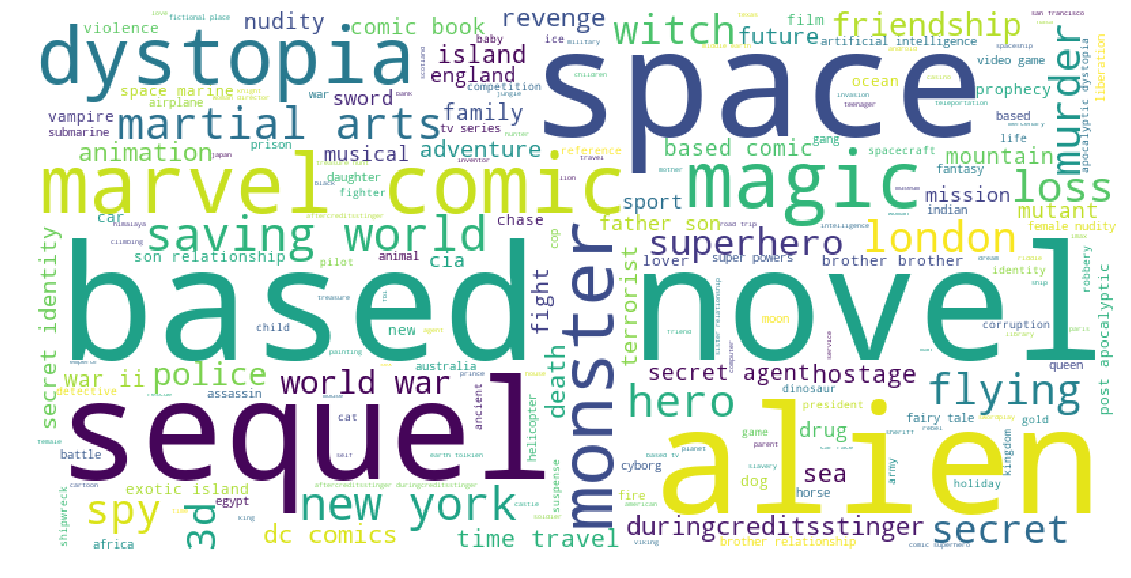

In [55]:
gen_key = pd.merge(genres,keywords, on = 'id')

stopwords = set(STOPWORDS)
cloud = WordCloud(width=800, height=400,background_color="white", max_words=200,stopwords=stopwords)
plt.figure( figsize=(20,10) );
adv_cloud = cloud.generate(gen_key.loc[gen_key['genres'] == 'Adventure', 'keywords'].str.cat(sep= '\n'))
plt.imshow(adv_cloud);
plt.axis('off');



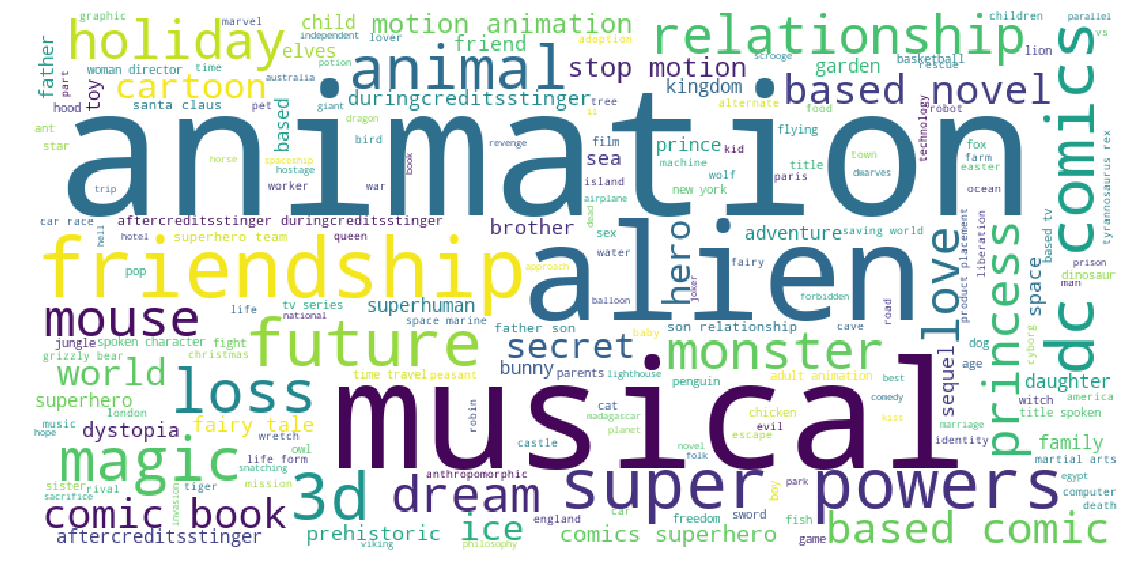

In [56]:
stopwords = set(STOPWORDS)
cloud = WordCloud(width=800, height=400,background_color="white", max_words=200,stopwords=stopwords)
plt.figure( figsize=(20,10) );
anim_cloud = cloud.generate(gen_key.loc[gen_key['genres'] == 'Animation','keywords'].str.cat(sep = '\n'))
plt.imshow(anim_cloud)
plt.axis('off');

<a id='conclusions'></a>
## Conclusion

- 80% of growth can be observed in releasing Movies from 1990 to 2000. 
- From 1960 to 2015 gross profit has increased from 1.25 billion dollars to 17.5 billion dollars. from 2000 to 2015 i.e in just 15years it has increased upto 10 billion dollars.
- Highest Number of movies released in 2013.
- Movie runtimes are generally between 80mins to 150mins.
- Movies are mostly made in drama, comedy, thriller, action, romance, adventure but apart from adventure & action,
 - animation, family, fantasy, science Fiction are the genres making gross profit above 80Million dollars. 
- Star wars, Avtar have made gross profits above 2.5 Billion dollars.
- Robert De Niro, Bruce Wills, Samuel L jackson, Nicolas Cage have worked in more than 50 movies.
- Robert MacNaughton, Daisy Ridley, Ben Wright, J pat O'Malley have earned a mean gross profit above 1.25 Billion dollars.
- Steven spielberg, Woody allen, Clint eastwood, Ridley scott are the directors who have directed more than 20 movies. 
- Clyde Geronimi, Hamilton Luske, Jennifer Lee, George Lucas have directed movies with mean gross profit above 1 billion dollars.
- Universal pictures, Warner bros, Paramount pictures, Twentieth century fox film corporation are the production comapnies who have created movies above 250.